In [1]:
#
# Julia version of code adapted from
# https://github.com/rawlings-group/paresto/blob/master/examples/green_book/ABC.m
#

In [7]:
using CSV, DataFrames
using JuMP, Ipopt
using Plots
using InfiniteOpt

In [3]:
ABC_data = CSV.read("data_sets/ABC_data.csv", DataFrame)

,t,ca,cb,cc
,Float64,Float64,Float64,Float64
1,0.0,0.957,-0.031,-0.015
2,0.263,0.557,0.33,0.044
3,0.526,0.342,0.512,0.156
4,0.789,0.224,0.499,0.31
5,1.053,0.123,0.428,0.454
6,1.316,0.079,0.396,0.556
7,1.579,0.035,0.303,0.651
8,1.842,0.029,0.287,0.658
9,2.105,0.025,0.221,0.75


In [8]:
opt = Ipopt.Optimizer    

In [50]:
texp = ABC_data.t
ca_exp = Dict(Pair.(ABC_data.t, ABC_data.ca))
cb_exp = Dict(Pair.(ABC_data.t, ABC_data.cb))
cc_exp = Dict(Pair.(ABC_data.t, ABC_data.cc))

Dict{Float64, Float64} with 20 entries:
  4.211 => 0.988
  4.474 => 0.941
  5.0   => 0.985
  0.263 => 0.044
  1.053 => 0.454
  0.526 => 0.156
  4.737 => 0.971
  0.0   => -0.015
  1.579 => 0.651
  3.421 => 0.899
  2.368 => 0.854
  2.105 => 0.75
  3.947 => 0.991
  3.158 => 0.942
  0.789 => 0.31
  1.316 => 0.556
  1.842 => 0.658
  2.632 => 0.845
  2.895 => 0.893
  3.684 => 0.942

In [51]:
tlist = unique(sort(vcat(collect(range(0.0, 5.0, length = 100)), texp)))

118-element Vector{Float64}:
 0.0
 0.050505050505050504
 0.10101010101010101
 0.15151515151515152
 0.20202020202020202
 0.25252525252525254
 0.263
 0.30303030303030304
 0.35353535353535354
 0.40404040404040403
 0.45454545454545453
 0.5050505050505051
 0.526
 ⋮
 4.494949494949495
 4.545454545454546
 4.595959595959596
 4.646464646464646
 4.696969696969697
 4.737
 4.747474747474747
 4.797979797979798
 4.848484848484849
 4.898989898989899
 4.94949494949495
 5.0

In [69]:
m = InfiniteModel(opt)

An InfiniteOpt Model
Feasibility problem with:
Finite Parameters: 0
Infinite Parameters: 0
Variables: 0
Derivatives: 0
Measures: 0
Optimizer model backend information: 
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: Ipopt

In [70]:
@infinite_parameter(m, t in [0, 5.0], supports = tlist)

t

In [71]:
@variables(m, 
    begin
        ca, Infinite(t)
        cb, Infinite(t)
        cc, Infinite(t)
    end
    )

In [73]:
@variable(m, k1 >= 0, start = 0.5)
@variable(m, k2 >= 0, start = 0.5)

k2

In [74]:
@constraint(m, ca(0) == 1.0)
@constraint(m, cb(0) == 0.0)
@constraint(m, cc(0) == 0.0)

cc(0) = 0.0

In [75]:
@constraint(m, @deriv(ca, t) == -k1 * ca)
@constraint(m, @deriv(cb, t) == k1 * ca - k2 * cb)
@constraint(m, @deriv(cc, t) == k2 * cb)

-cb(t)*k2 + ∂/∂t[cc(t)] = 0.0, ∀ t ∈ [0, 5]

In [76]:
@objective(m, Min, sum((ca(t) - ca_exp[t])^2 + (cb(t) - cb_exp[t])^2 + (cc(t) - cc_exp[t])^2 for t in texp))

ca(0)² + cb(0)² + cc(0)² + ca(0.263)² + cb(0.263)² + cc(0.263)² + ca(0.526)² + cb(0.526)² + cc(0.526)² + ca(0.789)² + cb(0.789)² + cc(0.789)² + ca(1.053)² + cb(1.053)² + cc(1.053)² + ca(1.316)² + cb(1.316)² + cc(1.316)² + ca(1.579)² + cb(1.579)² + cc(1.579)² + ca(1.842)² + cb(1.842)² + cc(1.842)² + ca(2.105)² + cb(2.105)² + cc(2.105)² + ca(2.368)² + cb(2.368)² + cc(2.368)² + ca(2.632)² + cb(2.632)² + cc(2.632)² + ca(2.895)² + cb(2.895)² + cc(2.895)² + ca(3.158)² + cb(3.158)² + cc(3.158)² + ca(3.421)² + cb(3.421)² + cc(3.421)² + ca(3.684)² + cb(3.684)² + cc(3.684)² + ca(3.947)² + cb(3.947)² + cc(3.947)² + ca(4.211)² + cb(4.211)² + cc(4.211)² + ca(4.474)² + cb(4.474)² + cc(4.474)² + ca(4.737)² + cb(4.737)² + cc(4.737)² + ca(5)² + cb(5)² + cc(5)² - 1.914 ca(0) + 0.062 cb(0) + 0.03 cc(0) - 1.114 ca(0.263) - 0.66 cb(0.263) - 0.088 cc(0.263) - 0.684 ca(0.526) - 1.024 cb(0.526) - 0.312 cc(0.526) - 0.448 ca(0.789) - 0.998 cb(0.789) - 0.62 cc(0.789) - 0.246 ca(1.053) - 0.856 cb(1.053) - 0.908 c

In [77]:
optimize!(m)

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     2354
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      532

Total number of variables............................:      710
                     variables with only lower bounds:        2
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      708
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

In [78]:
termination_status(m)

LOCALLY_SOLVED::TerminationStatusCode = 4

In [80]:
value(k1), value(k2)

(2.1332369829000344, 0.9908553359382726)

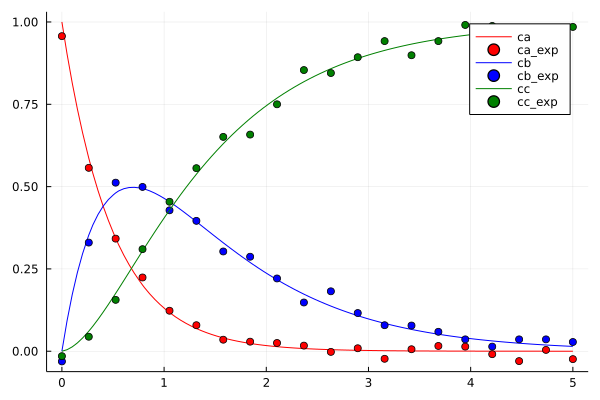

In [93]:
plot(tlist, value(ca), label = "ca", color = "red")
plot!(texp, [ca_exp[t] for t in texp], seriestype = :scatter, label = "ca_exp", color = "red")
plot!(tlist, value(cb), label = "cb", color = "blue")
plot!(texp, [cb_exp[t] for t in texp], seriestype = :scatter, label = "cb_exp", color = "blue")
plot!(tlist, value(cc), label = "cc", color = "green")
plot!(texp, [cc_exp[t] for t in texp], seriestype = :scatter, label = "cc_exp", color = "green")